INTRODUCTION:
    In this project I will be attempting to use the given dataset to predict student's gpa's. This dataset contains various information about students' demographics, including physical location, time studied, major, income demographic, assistance received, age, credits atttempted, year of college, and current year. Note that these students are all from the same school, so the quality of their current education should equivalent for all of them (assuming the school's departments are comparable in quality)
    
An algorithm that can predict students' succcess based on 

In [1]:
import pandas as pd;

In [2]:
df = pd.read_csv("~/Desktop/my_data.csv");

DATA EXPLORATION:

ID: This could be useful. If the student already has grade data within the database, that could help us determine their next gpa. That being said, we have to make sure that this is treated as categorical data and not numerical. Two students having consecutive ID numbers means nothing. 

In [3]:
df["id"].describe()

count    1000000.000000
mean       63250.500000
std        28867.527892
min        13251.000000
25%        38250.750000
50%        63250.500000
75%        88250.250000
max       113250.000000
Name: id, dtype: float64

<AxesSubplot:>

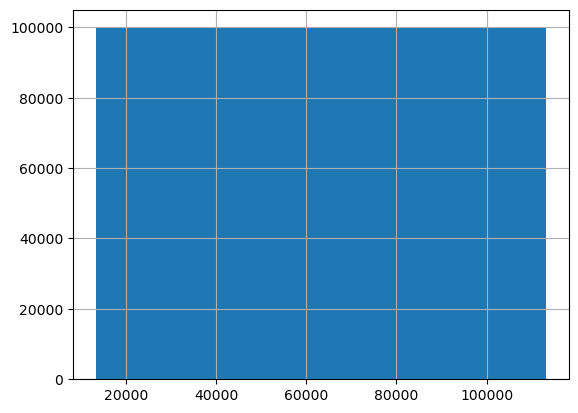

In [4]:
df["id"].hist()

LAT/LON: Could be useful when analyzing specific cases. Would be more useful if we had information about that location, but could cause problems. If the North U.S. has a better education system on average than the south, that does not necessarily mean north = better, but the algorithm could think that

In [5]:
df["lat"].describe()

count    1000000.000000
mean          37.572477
std            2.772581
min           31.899546
25%           38.399398
50%           39.050620
75%           39.296096
max           40.196585
Name: lat, dtype: float64

In [6]:
df["lon"].describe()

count    1000000.000000
mean         -84.171482
std            7.572241
min          -94.754033
25%          -93.387511
50%          -77.548696
75%          -76.812233
max          -75.790679
Name: lon, dtype: float64

<AxesSubplot:>

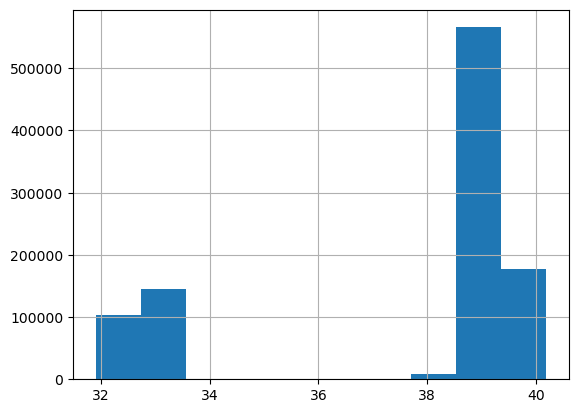

In [7]:
df["lat"].hist()

<AxesSubplot:>

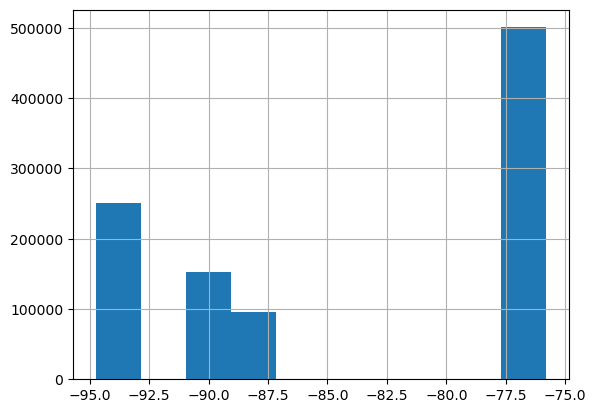

In [8]:
df["lon"].hist()

AVG_HOURS_STUDIED: potentially the most useful data in this database. Measures not only how prepared students are, but also how much they care about their academics

In [9]:
df["avg_hours_studied"].describe()

count    1000000.000000
mean           5.437559
std          100.959857
min            0.000000
25%            3.000000
50%            4.000000
75%            5.000000
max        10000.000000
Name: avg_hours_studied, dtype: float64

<AxesSubplot:>

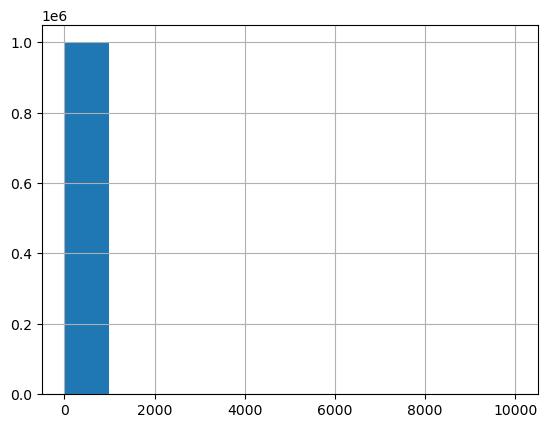

In [10]:
df["avg_hours_studied"].hist()

PARENTS_INCOME: Very relevant to academic success. Better school systems, better tutoring, better laptop, etc. This has a high correlation with SAT score. 

In [11]:
df["parents_income"].describe()

count    1000000.000000
mean       88670.500485
std        30835.445794
min        18229.301767
25%        64680.880300
50%        79932.013390
75%       109623.813422
max       196273.337246
Name: parents_income, dtype: float64

<AxesSubplot:>

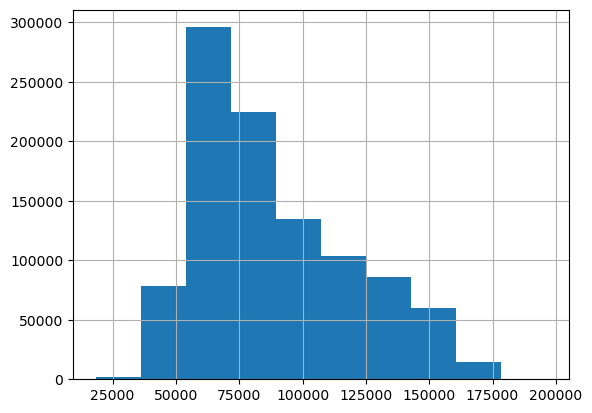

In [12]:
df["parents_income"].hist()

MAJOR: Very relevant. Some majors are more challenging than others. Note: I have to one-hot-encode the majors

In [13]:
df["major"].describe()

count     1000000
unique          5
top       Physics
freq       200833
Name: major, dtype: object

<AxesSubplot:>

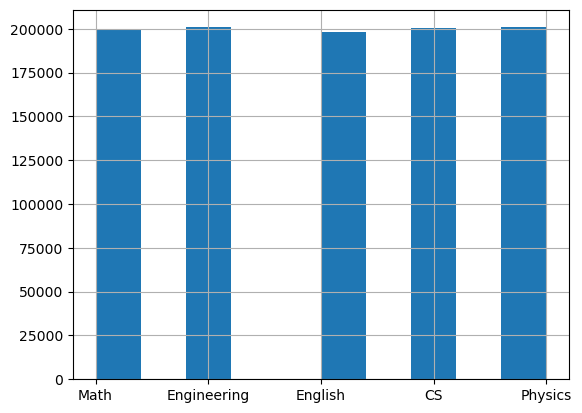

In [14]:
df["major"].hist()

TUTORING: Very imporant factor. Students who receive extra help, or even care enough to seek it out, are more likely to succeed. 

In [15]:
df["tutoring"].describe()

count     950502
unique         2
top           No
freq      923106
Name: tutoring, dtype: object

<AxesSubplot:>

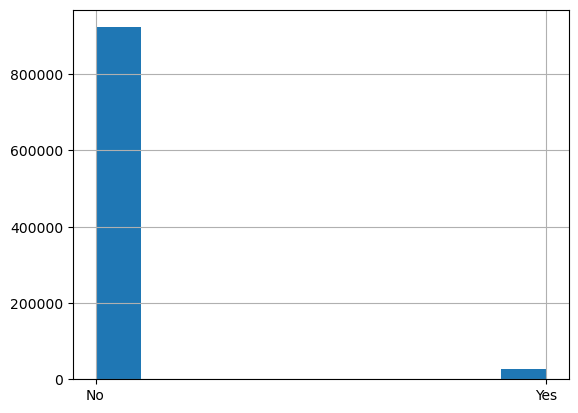

In [16]:
df["tutoring"].hist()

SEMESTER: I don't think this will be extremely relevant. Even if there is some seasonal effect on gpa, wouldn't it affect all the students equally?

In [17]:
df["semester"].describe()

count     1000000
unique          2
top          Fall
freq       500000
Name: semester, dtype: object

<AxesSubplot:>

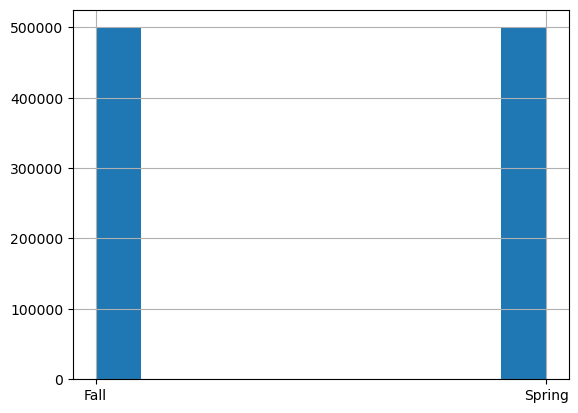

In [18]:
df["semester"].hist()

CREDITS: Students with a heavier courseload will likely have a lower GPA

In [19]:
df["credits"].describe()

count    1000000.000000
mean          13.496022
std            3.353377
min            9.000000
25%            9.000000
50%           12.000000
75%           15.000000
max           18.000000
Name: credits, dtype: float64

<AxesSubplot:>

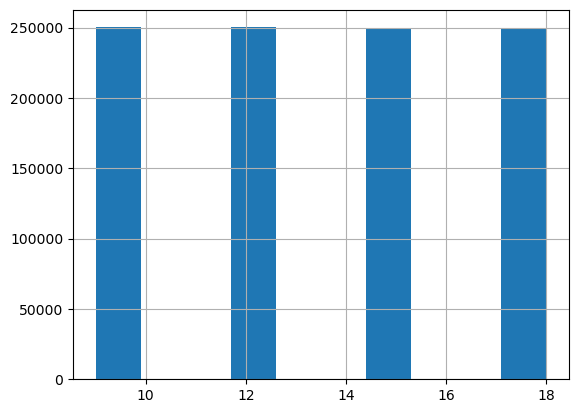

In [20]:
df["credits"].hist()

STUDENT_AGE: Are they a grad student? Are they taking a long time to finish college? This might be relevant information, but it's already included in the next datapoint, so this is probably useless. 

In [21]:
df["student_age"].describe()

count    1000000.000000
mean          21.234460
std            2.506658
min           17.000000
25%           20.000000
50%           21.000000
75%           22.000000
max           33.000000
Name: student_age, dtype: float64

<AxesSubplot:>

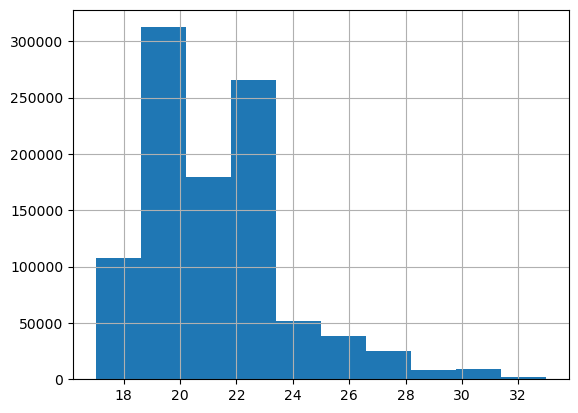

In [22]:
df["student_age"].hist()

STUDENT_YEAR: This coule be relevant. Freshman are new and struggling, but seniors are taking harder classes and are burnt out. 

NOTE: I have to one-hot-encode this

In [23]:
df["student_year"].describe()

count     1000000
unique          4
top        Senior
freq       400000
Name: student_year, dtype: object

<AxesSubplot:>

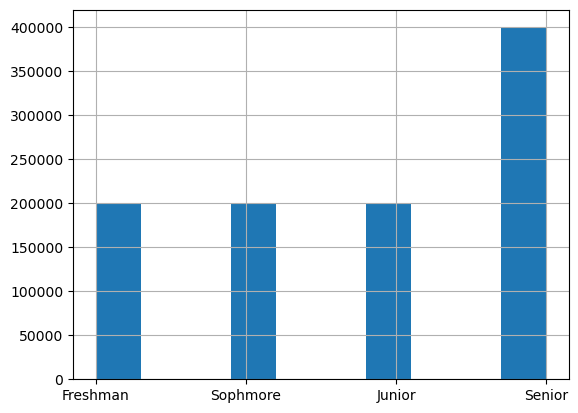

In [24]:
df["student_year"].hist()

YEAR: It will probably be useless unless we're trying to account for COVID grades or changes in the curriculum. 

In [25]:
df["year"].describe()


count    1000000.00000
mean        2014.97866
std            4.85799
min         2005.00000
25%         2011.00000
50%         2015.00000
75%         2019.00000
max         2025.00000
Name: year, dtype: float64

<AxesSubplot:>

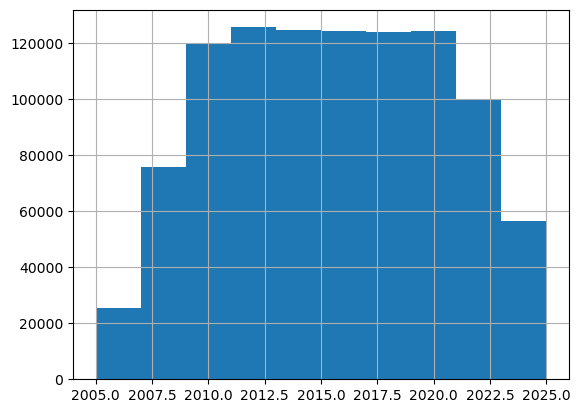

In [26]:
df["year"].hist()





QUESTION 1: Does this school have transfer students? 

No. Everyone starts off as a freshman, and they all take exactly 5 years to graduate. 

In [27]:
df.groupby("id")["student_year"].value_counts().describe()

count    400000.000000
mean          2.500000
std           0.866026
min           2.000000
25%           2.000000
50%           2.000000
75%           2.500000
max           4.000000
Name: student_year, dtype: float64

QUESTION 2: What is the median length of attendance at this university?

Everyone seems to attend for exactly 5 years at this university

Question 3: Do you think this university has any one credit classes?

No. Each of the total credit counts are multiples of 3

In [28]:
df["credits"].value_counts()

9     250264
12    250264
15    250006
18    249466
Name: credits, dtype: int64

Question 4: Is grade inflation a problem at this university?

I would argue yes. Over time, the average gpa is increasing. 

<AxesSubplot:xlabel='year', ylabel='gpa'>

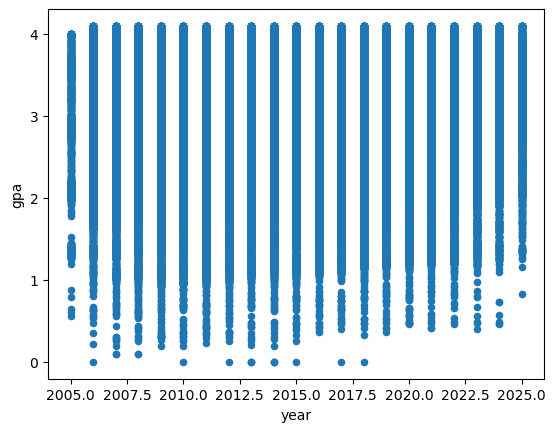

In [29]:
df.plot(kind = 'scatter', x = 'year', y = 'gpa')

Question 5: In what area do you think this university might be located? 

Somewhere in Virginia (I checked google maps)

Question 6: Does tutoring make a statistically significant difference in grade?

It seemingly causes a slight increase in gpa

Question 7: How often do students switch majors?

(0 + 1 * 6617/100000 + 2 * 167/100000 + 3 * 1/100000) = 0.06954

Students switch their majors an average of 0.07 times 

In [30]:
df.groupby("id")["major"].nunique().value_counts()

1    93215
2     6617
3      167
4        1
Name: major, dtype: int64

Question 8: Do different majors have different gpa distributions?

They are relatively the same, but English has the highest mean and median gpa. 

In [31]:
df.groupby("major")["gpa"].describe()

,count,mean,std,min,25%,50%,75%,max
major,,,,,,,,
CS,200505.0,3.535839,0.607557,0.00,3.18,3.84,4.0,4.0
Engineering,200787.0,3.544374,0.604892,0.26,3.21,3.87,4.0,4.0
English,198125.0,3.632158,0.604164,0.00,3.29,3.94,4.1,4.1
Math,199750.0,3.543705,0.605236,0.00,3.20,3.87,4.0,4.0
Physics,200833.0,3.534123,0.608551,0.00,3.17,3.84,4.0,4.0






DATA CLEANING:

For latitude and longitude, I think I'm just going to normalize the data so it can be handled by whatever machine learning algorithm I use. I might also use binning to divide the latitude/longitude into different sections. 

In [32]:
lat_min = df["lat"].min()
lat_max = df["lat"].max()

f = lambda x: (x - lat_min)/lat_max

df["lat"] = df["lat"].apply(f)

In [33]:
lon_min = df["lon"].min()
lon_max = df["lon"].max()

f = lambda x: (x - lon_min)/lon_max

df["lon"] = df["lon"].apply(f)

Now for filling in missing values:
Only 1 column has missing values, and it's tutoring. When put into context, it seems possible that students left this field blank because they were embarrassed that they needed help. Therefore, I will fill the NaN values in the tutoring column with 'yes'. 

In [34]:
df["tutoring"] = df["tutoring"].fillna("yes")

ONE-HOT-ENCODING:

Major, tutoring, semester, and student_year all need to be one_hot_encoded. 

In [35]:
df = pd.get_dummies(df, columns = ['major', 'tutoring', 'student_year'])


DROPPING DATA:

SEMESTER, YEAR, 

In [36]:
df.drop(['semester','year'], axis = 1, inplace = True);





EVALUATION:

I'm going to randomly separate the data into two different subsets, one will become the training set, and one will the become testing set. 

I'll evaluate the learning model by calculating the Root Mean Squared Error. It seems like a direct and reasonable approach to measuring how accurate the model is. 

Linear Regression: 0.549

In [37]:
train = df.loc[0:80000];
test = df.loc[80001:100000];

X_train = train.drop(['gpa'], axis = 1);
y_train = train['gpa'];
X_test = test.copy();
y_test = test['gpa'];
X_test = X_test.drop(['gpa'], axis = 1);

from sklearn.metrics import accuracy_score, mean_squared_error





MODELS (I have time for one):

Linear Regression: 
-Root Mean Squared Error = 0.549

In [38]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)
Y_pred = slr.predict(X_test)

acc_slr = mean_squared_error(Y_pred, y_test, squared = False)
acc_slr

0.549548380723182

Conclusion:

Feature Engineering:
I normalized longitude and latitude
Replaced blank tutoring values with 'yes' due to the context of the data (they might be embarrassed)
Dropped the "semester" and "year" columns since they seemed irrelevant

Training Model:
I divided the database into two subsets: a training set (80% of entries) and a test set (20% of entries)
I trained a linear regression model and it had a root mean squared error of about 0.55 which is acceptable enough given that this was a "toy problem". If I had more time I would have found some other models to experiment with, but what's done is done. 

In the future, the model could benefit from having the students' standardized test scores, or perhaps some quantifiable measure of the quality of their local school system. 